In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


**EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(data.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [ ]:
data['sales'] = pd.to_numeric(data['sales'], errors='coerce')

In [ ]:
data.replace('low', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

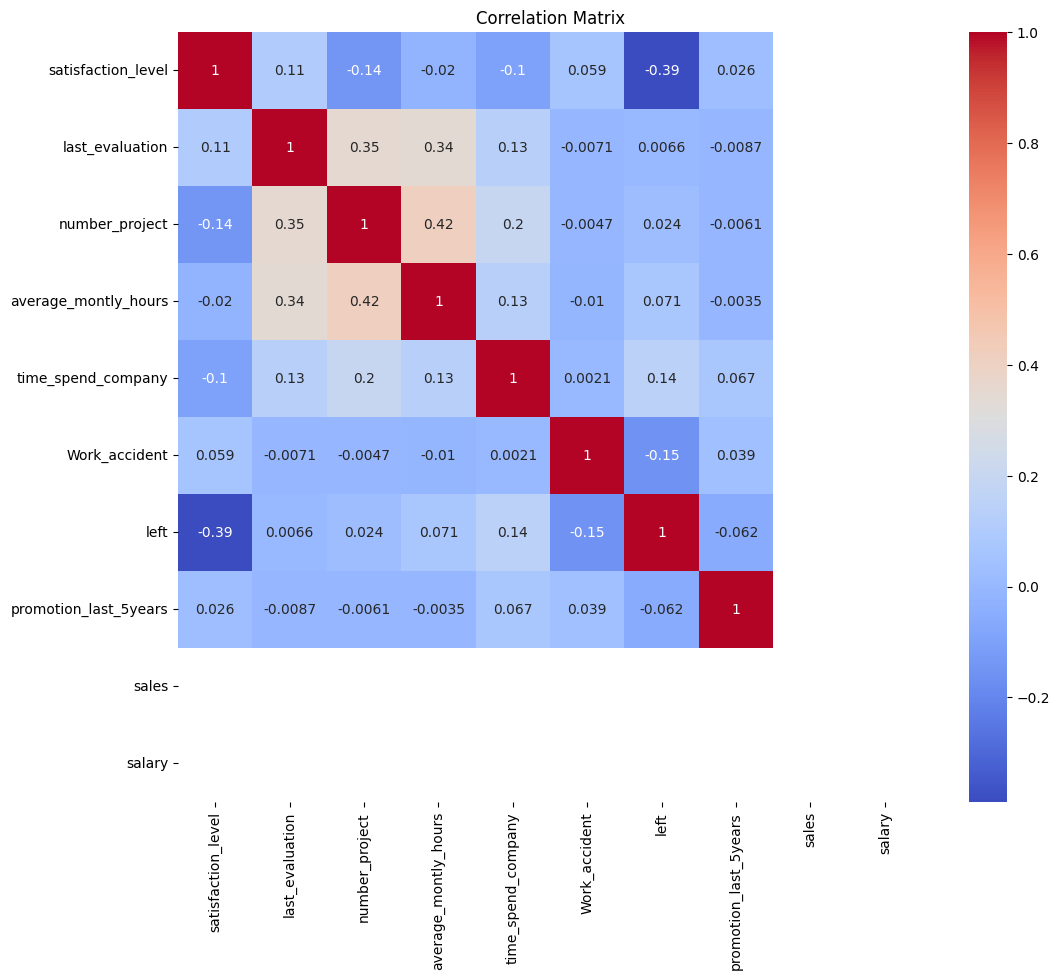

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
categorical_cols = ['sales', 'salary']
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in sales: [nan]
Unique values in salary: [nan]


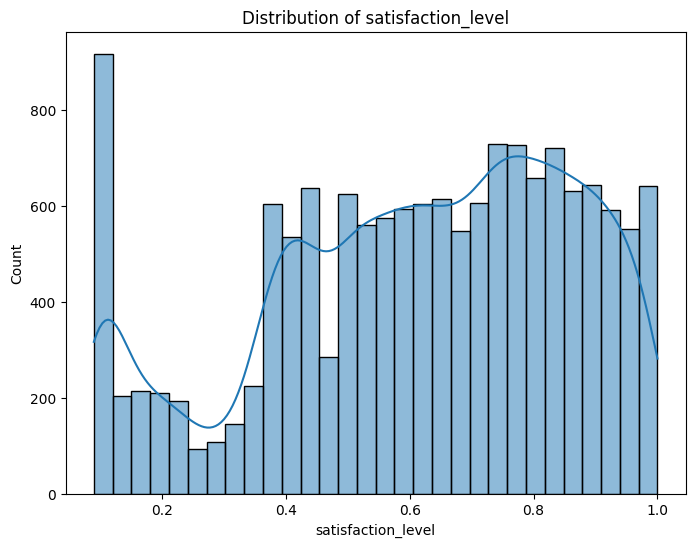

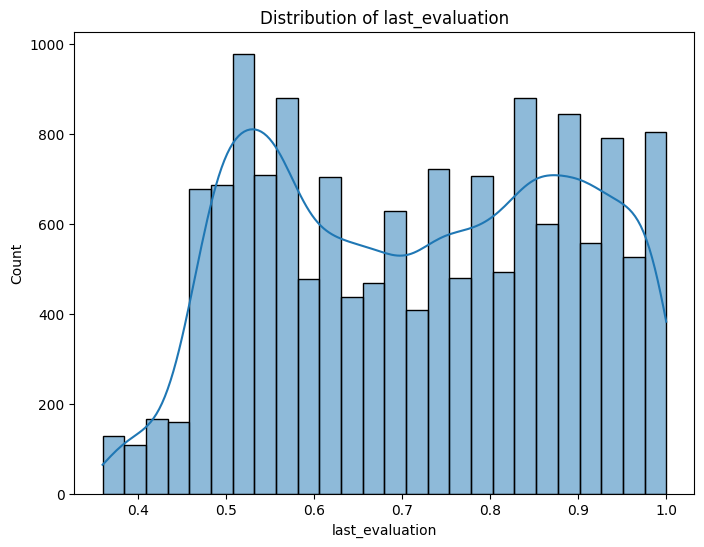

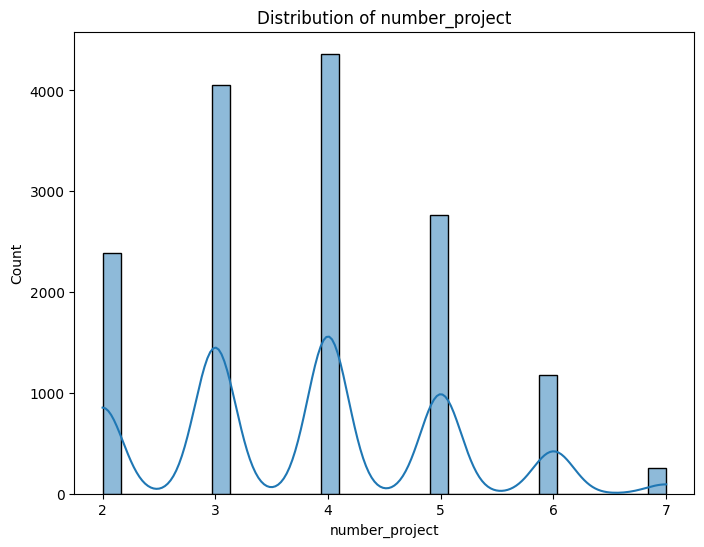

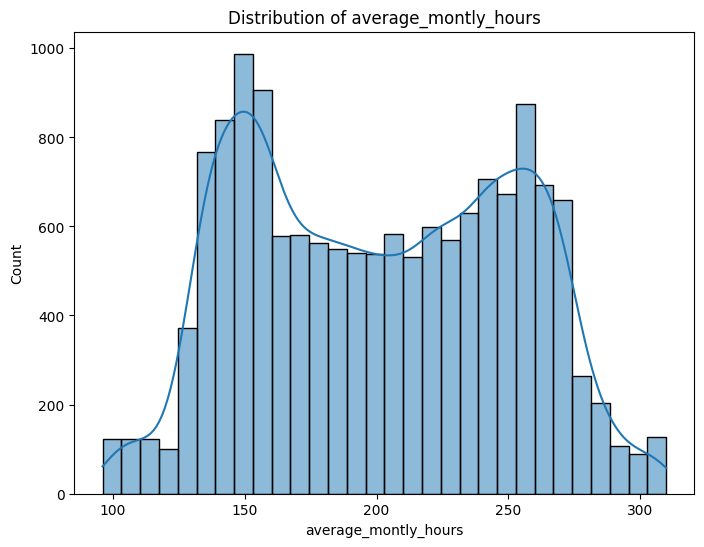

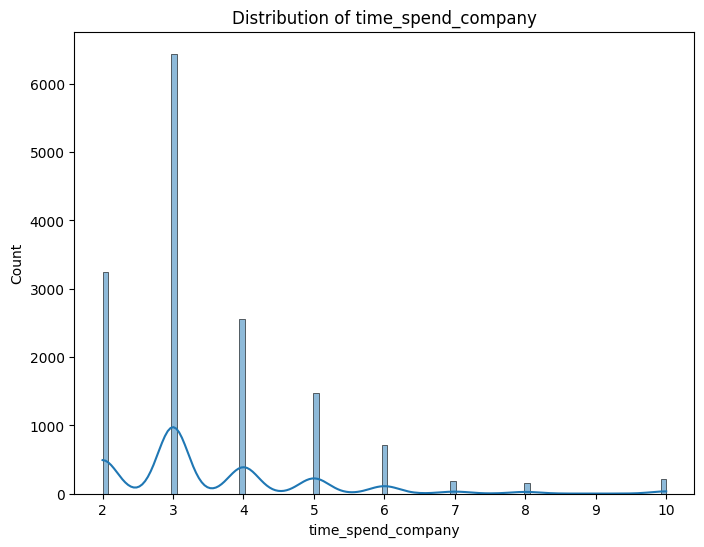

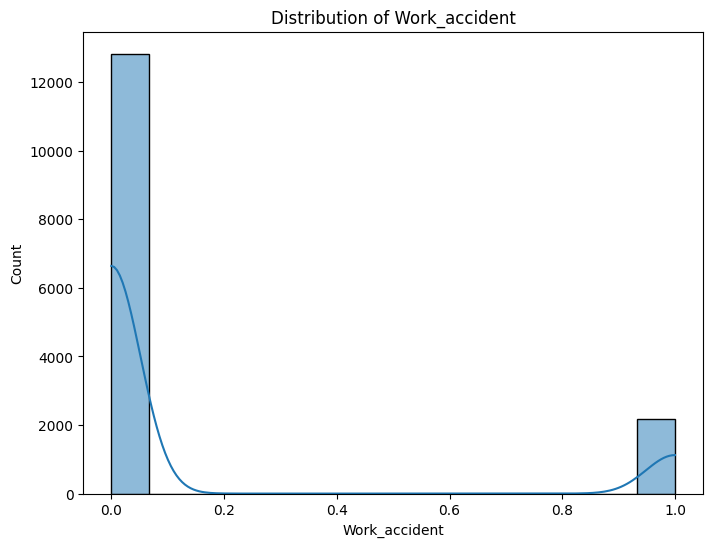

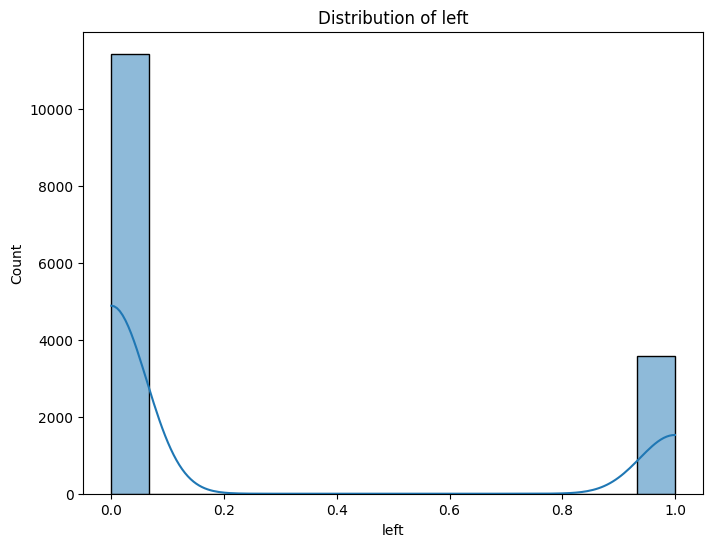

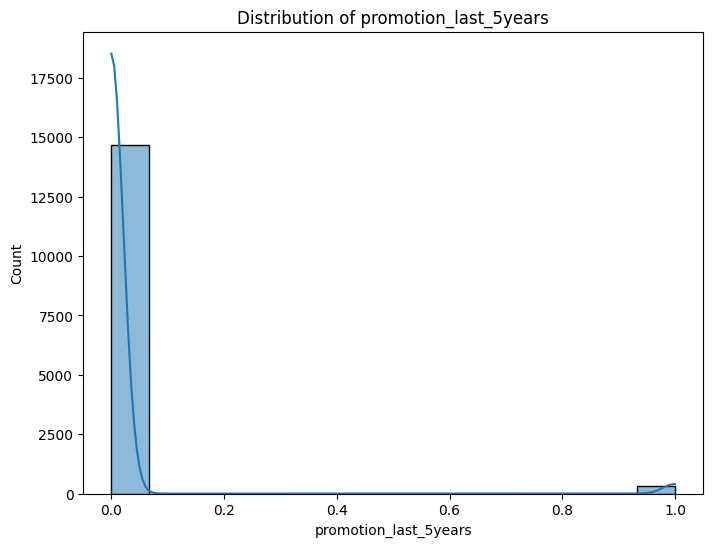

In [12]:
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

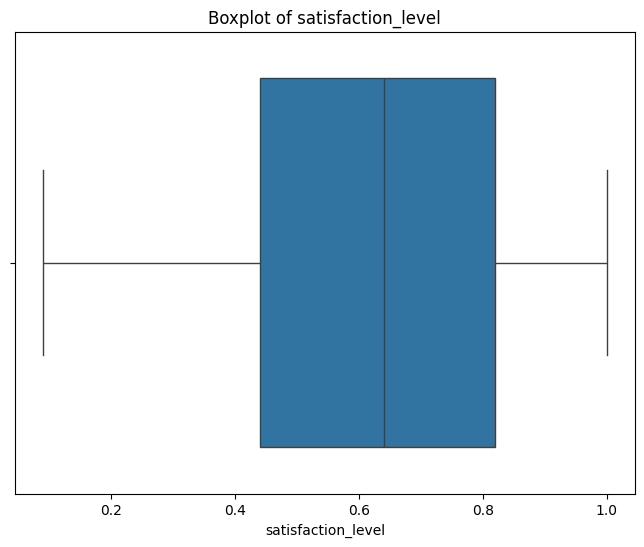

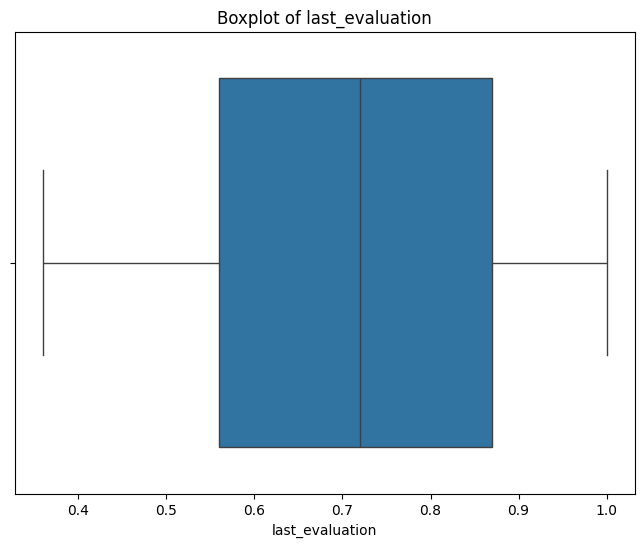

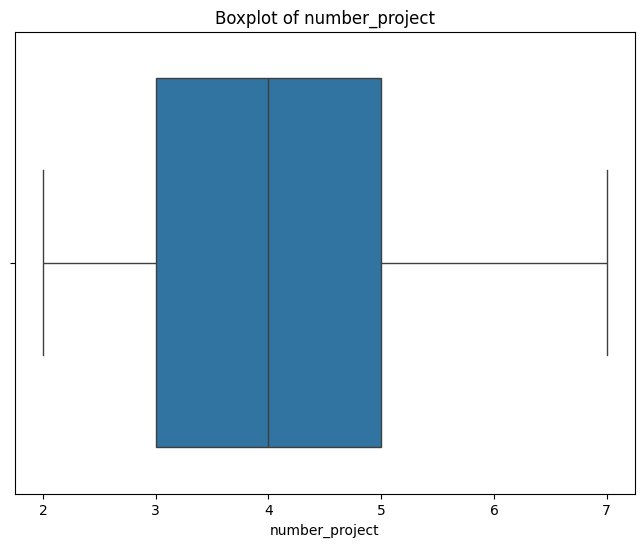

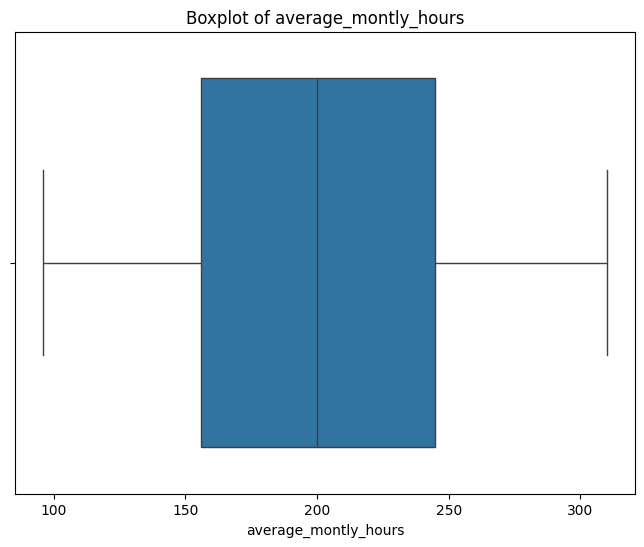

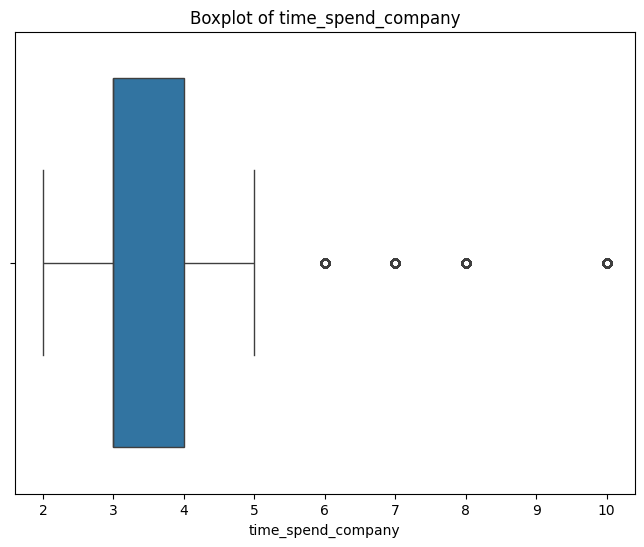

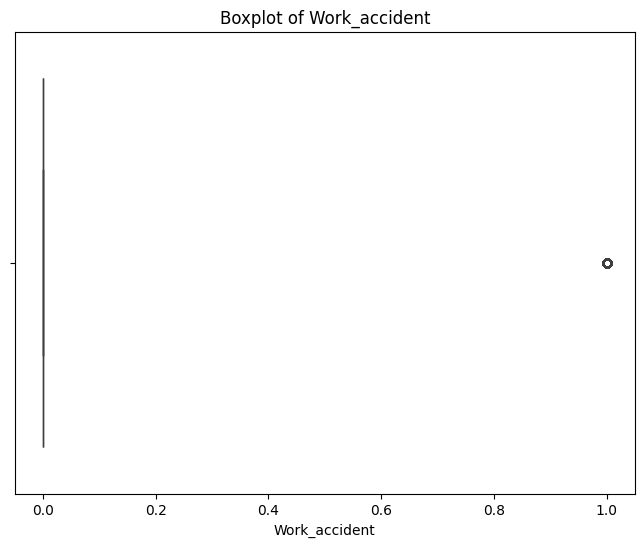

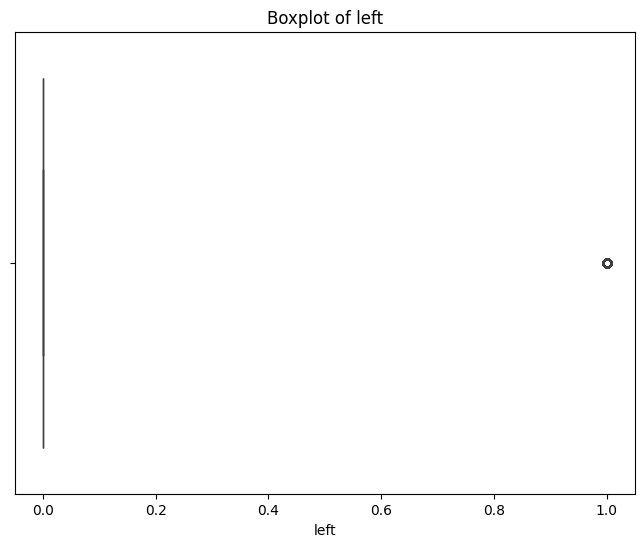

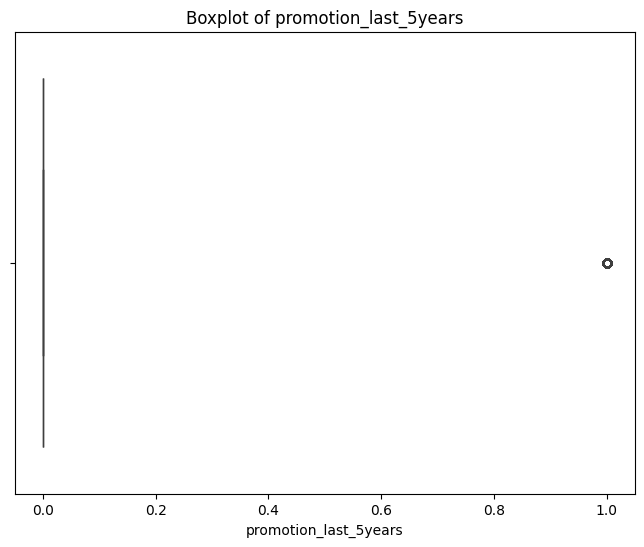

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.show()

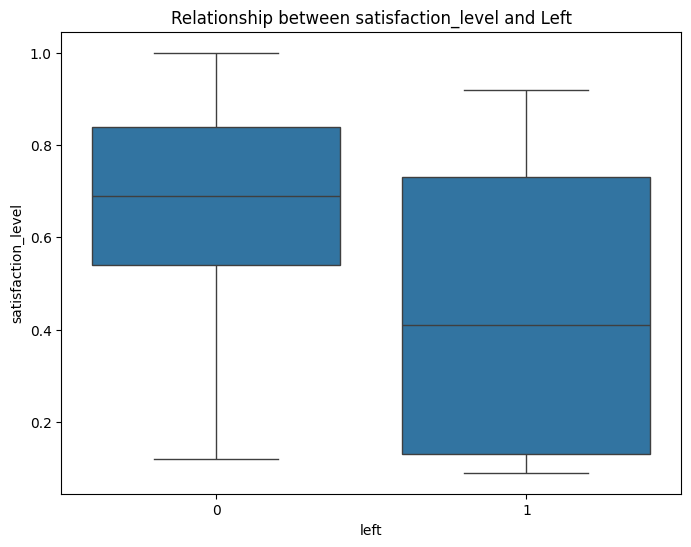

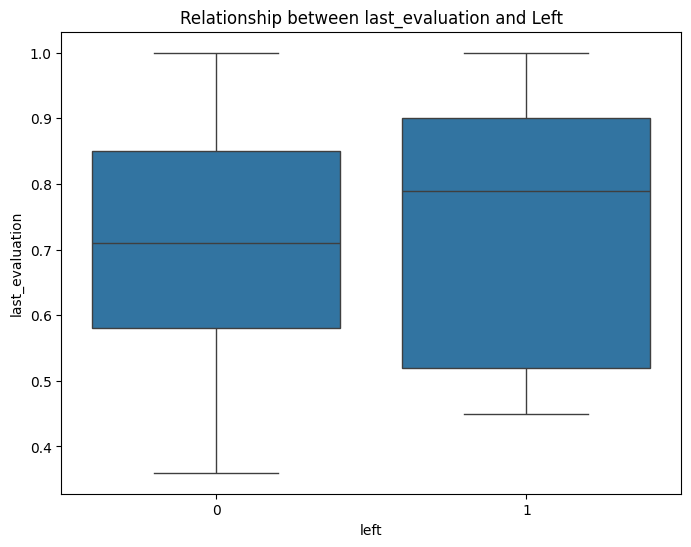

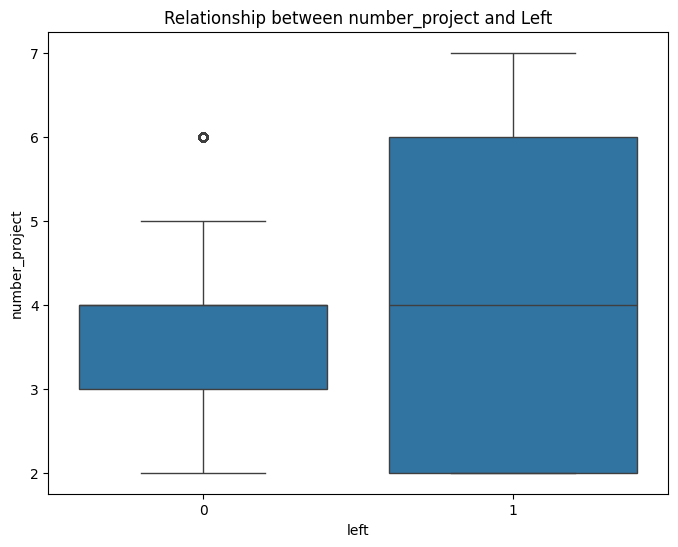

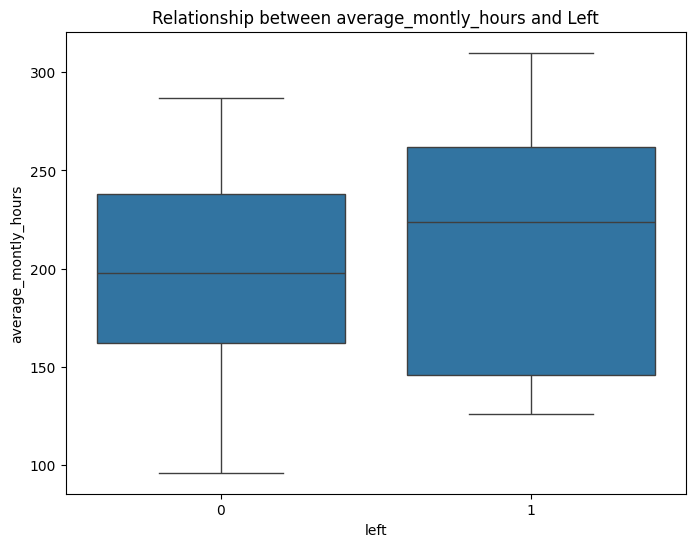

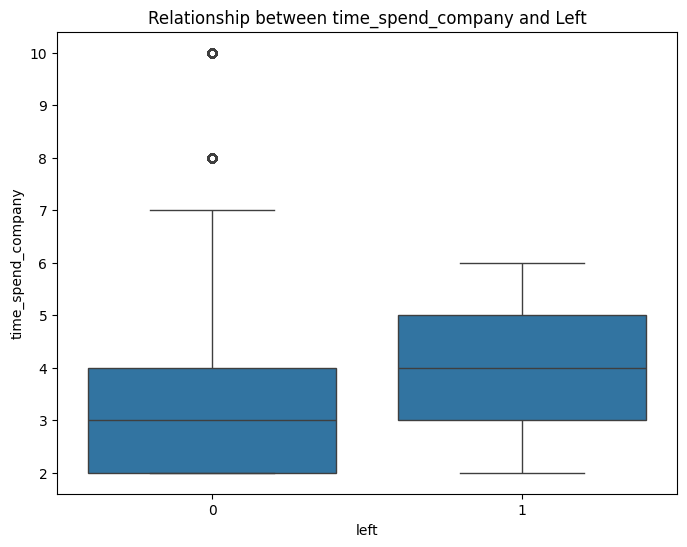

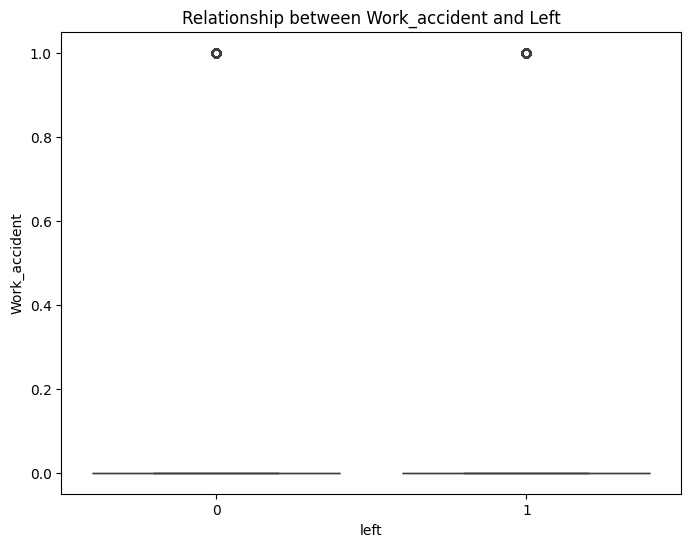

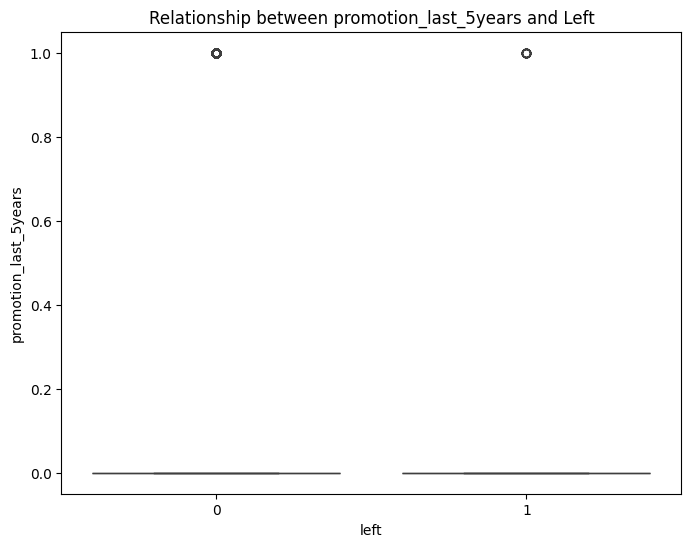

In [14]:
for col in numerical_cols:
  if col != 'left': # Skip 'left' itself
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='left', y=col, data=data)
    plt.title(f'Relationship between {col} and Left')
    plt.show()

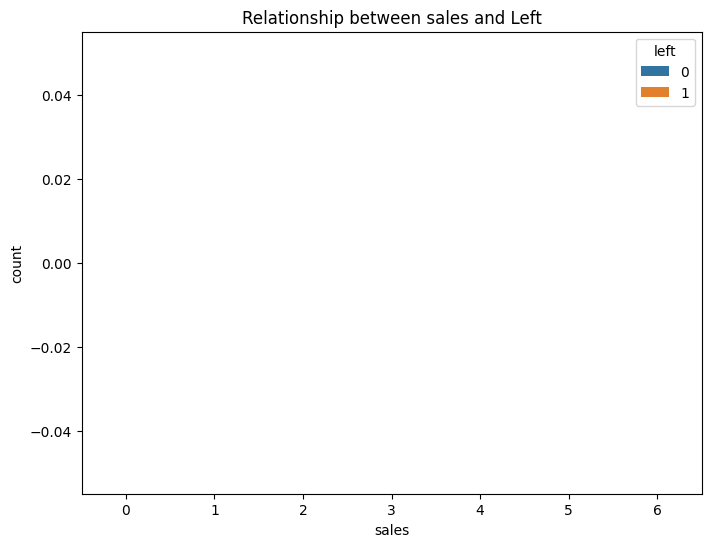

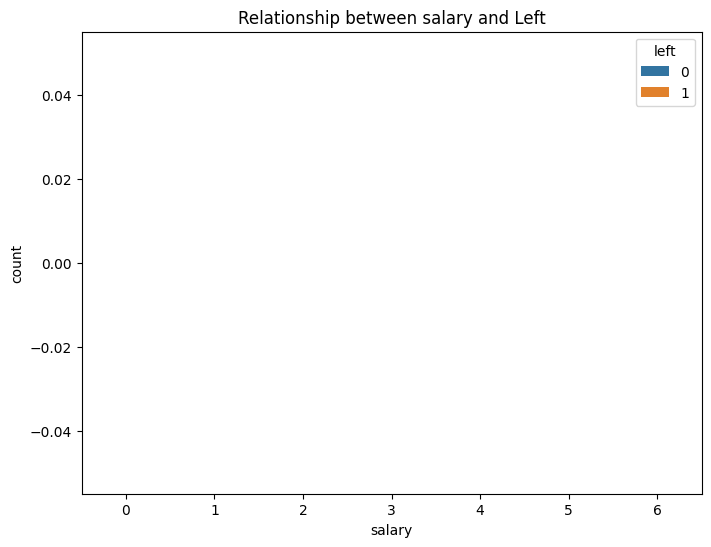

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='left', data=data)
    plt.title(f'Relationship between {col} and Left')
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
features_for_clustering = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
X = data[features_for_clustering]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

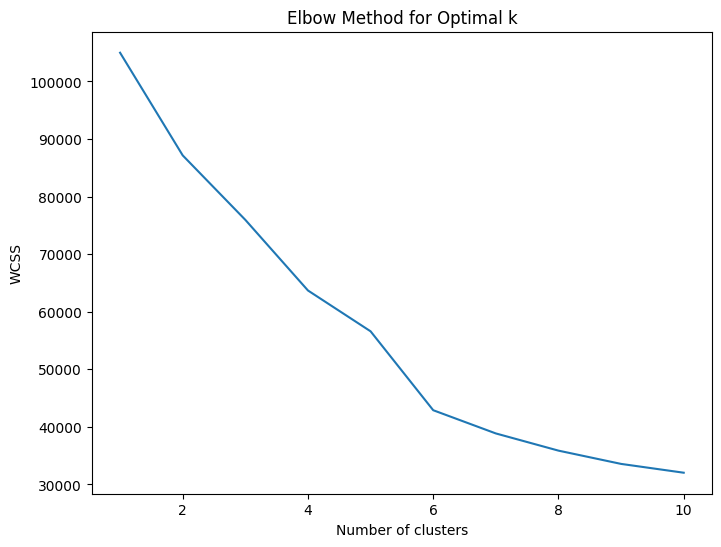

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

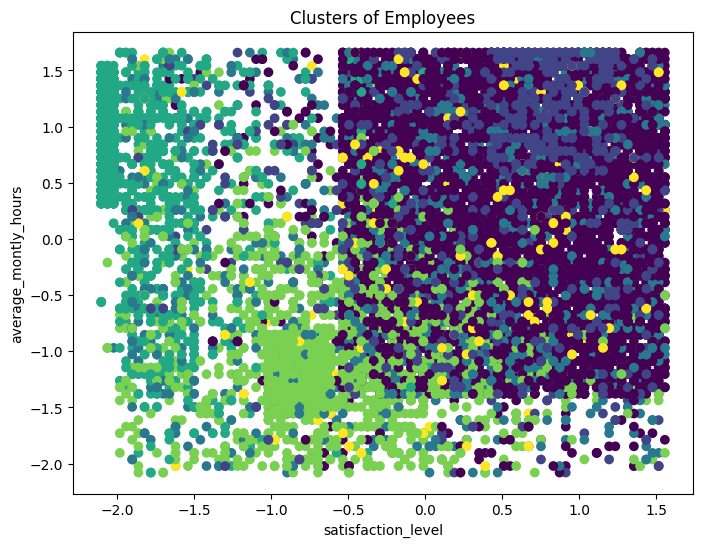

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['cluster'], cmap='viridis')
plt.title('Clusters of Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.show()

In [24]:
for cluster in range(optimal_k):
  print(f"Cluster {cluster}:")
  print(data[data['cluster'] == cluster][features_for_clustering].describe())
  print("/n")

Cluster 0:
       satisfaction_level  last_evaluation  number_project  \
count         6275.000000      6275.000000     6275.000000   
mean             0.747916         0.749804        3.801912   
std              0.153134         0.149211        0.859307   
min              0.200000         0.360000        2.000000   
25%              0.630000         0.630000        3.000000   
50%              0.750000         0.750000        4.000000   
75%              0.880000         0.880000        4.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count           6275.000000         6275.000000         6275.0   
mean             207.475857            2.816096            0.0   
std               41.895842            0.686842            0.0   
min               96.000000            2.000000            0.0   
25%              173.000000            2.000000            0.0   
50%              209.000000       

In [25]:
!pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X = data.drop('left', axis=1)
y = data['left']

In [28]:
smote = SMOTE(random_state=42)

In [30]:
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index]

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['sales' 'salary']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [33]:
X_smote, y_smote = smote.fit_resample(X_imputed, y)

In [34]:
print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", pd.Series(y_smote).value_counts())

Original class distribution: left
0    11428
1     3571
Name: count, dtype: int64
Resampled class distribution: left
1    11428
0    11428
Name: count, dtype: int64


In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
model = LogisticRegression()

In [46]:
accuracy_scores = []
for train_index, test_index in kf.split(X_smote):
    X_train, X_test = X_smote[train_index], X_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [47]:
for fold, accuracy in enumerate(accuracy_scores):
    print(f"Fold {fold+1} Accuracy: {accuracy}")
print(f"Average Accuracy: {np.mean(accuracy_scores)}")

Fold 1 Accuracy: 0.7510936132983377
Fold 2 Accuracy: 0.8122949026471231
Fold 3 Accuracy: 0.8109822795887115
Fold 4 Accuracy: 0.8109822795887115
Fold 5 Accuracy: 0.792386786261212
Average Accuracy: 0.7955479722768191


In [48]:
from sklearn.metrics import precision_score, recall_score , f1_score

In [52]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [53]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.7860445565363599
Recall: 0.8095238095238095
F1-score: 0.7976114310087439
